<a href="https://colab.research.google.com/github/anooprnathblq/DSA_Python/blob/main/Anoop_Assisgnment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from csv import excel
df=pd.read_excel('/content/iris.xls')

In [3]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#Missing values are there
#Checking for any vlues other than NaN like ?
df['SL'].unique()

array([5.1, 4.9, nan, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 4.7,
       5.5, 4.5, 5.3, 7. , 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.4, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [6]:
#Checking for any vlues other tha null like ?
df['SW'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, nan, 4. , 4.4, 3.8, 3.7,
       3.3, 4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [7]:
#Checking for any vlues other tha null like ?
df['PL'].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, nan, 4.7, 4.5, 4.9,
       4. , 4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8,
       3.7, 5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.1, 6.4, 5.4, 5.2])

In [8]:
#Checking for any vlues other tha null like ?
df['PW'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [9]:
#Only NaN values are there for SL,SW and PL
#checking for number of missing values
df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [10]:
#Checking mean and median for these three features
df.drop("Classification",axis=1).mean()

SL    5.855944
SW    3.049306
PL    3.756250
PW    1.198667
dtype: float64

In [11]:
df.drop("Classification",axis=1).median()

SL    5.80
SW    3.00
PL    4.35
PW    1.30
dtype: float64

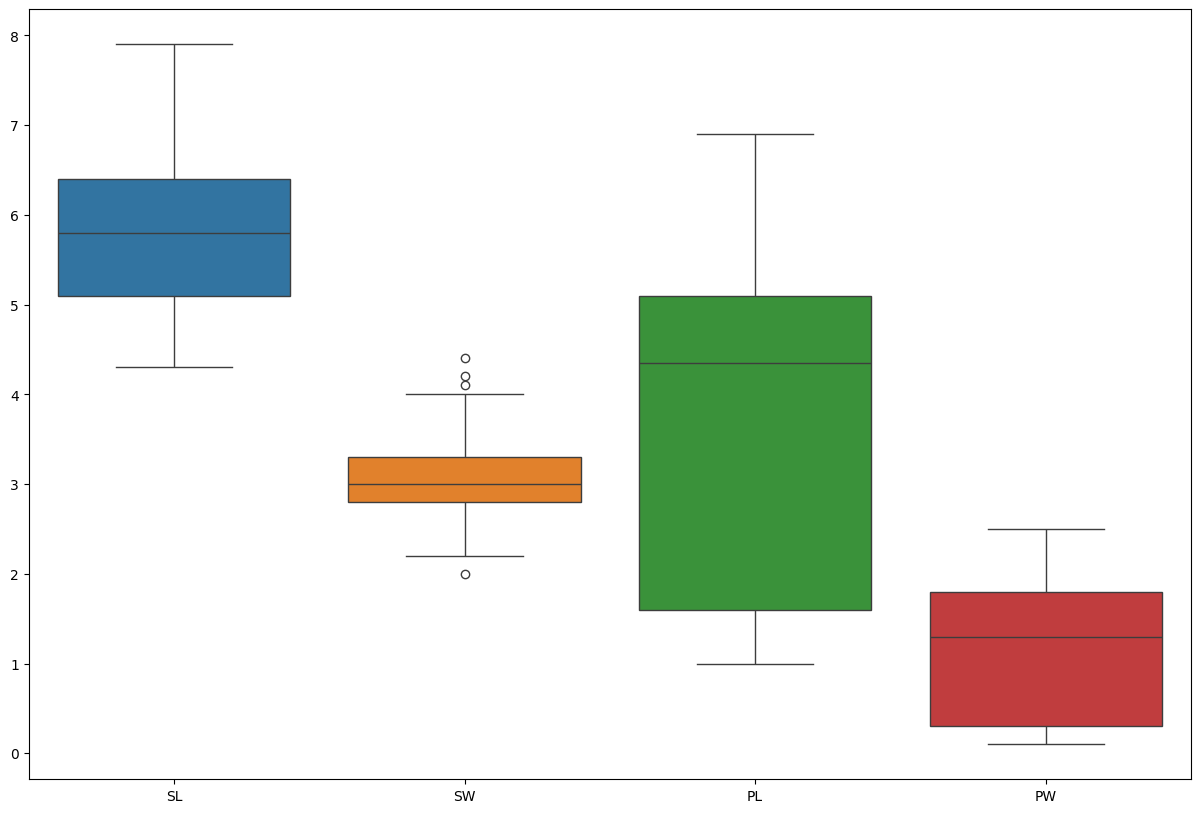

In [12]:
#Cheking for ouliers
features = df.drop("Classification",axis=1)  ##Plot to see the outliers
plt.figure(figsize=(15,10))
sns.boxplot(data = features)
plt.show()

In [ ]:
#Mean and median values close together indicates that columns SL,SW and PL follows more or less a normal distribution
#Number of missing values are comapritively smaller
#Ouliers only in one feature and that too small in number
#As such taking mean for filling the null values

In [13]:
for i in ['SL','SW','PL']:
    df[i]=df[i].fillna(df[i].mean())

In [14]:
#Checking whether NanS are filled
df.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

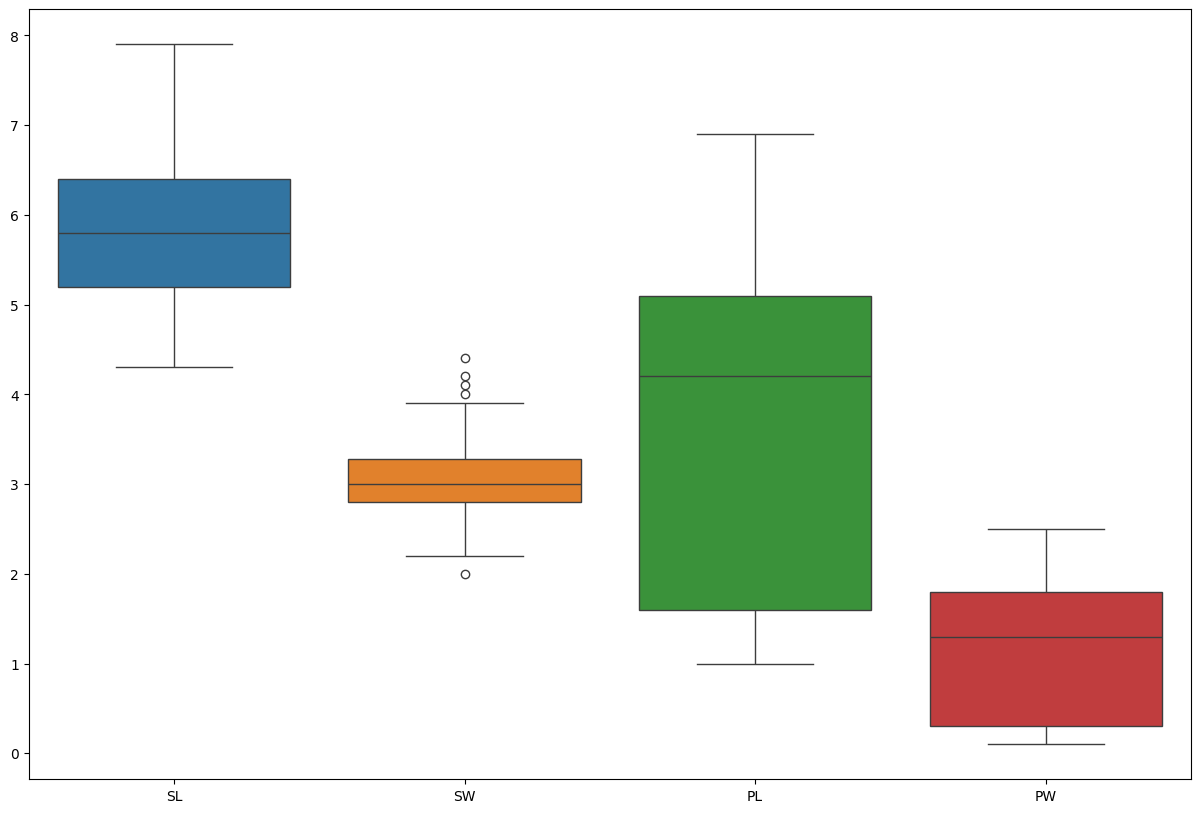

In [15]:
#Checking  of outliers for the the new dataframe
features = df.drop("Classification",axis=1)  ##Plot to see the outliers
plt.figure(figsize=(15,10))
sns.boxplot(data = features)
plt.show()

In [16]:
#outliers present only for the feature SW
#Removing the outliers
Q1 = df['SW'].quantile(0.25)
Q3 = df['SW'].quantile(0.75)         ##Finding Q1,Q3,IQR
IQR = Q3 - Q1
df['SW'] = df['SW'].clip(lower = Q1-1.5*IQR, upper = Q3+1.5*IQR)

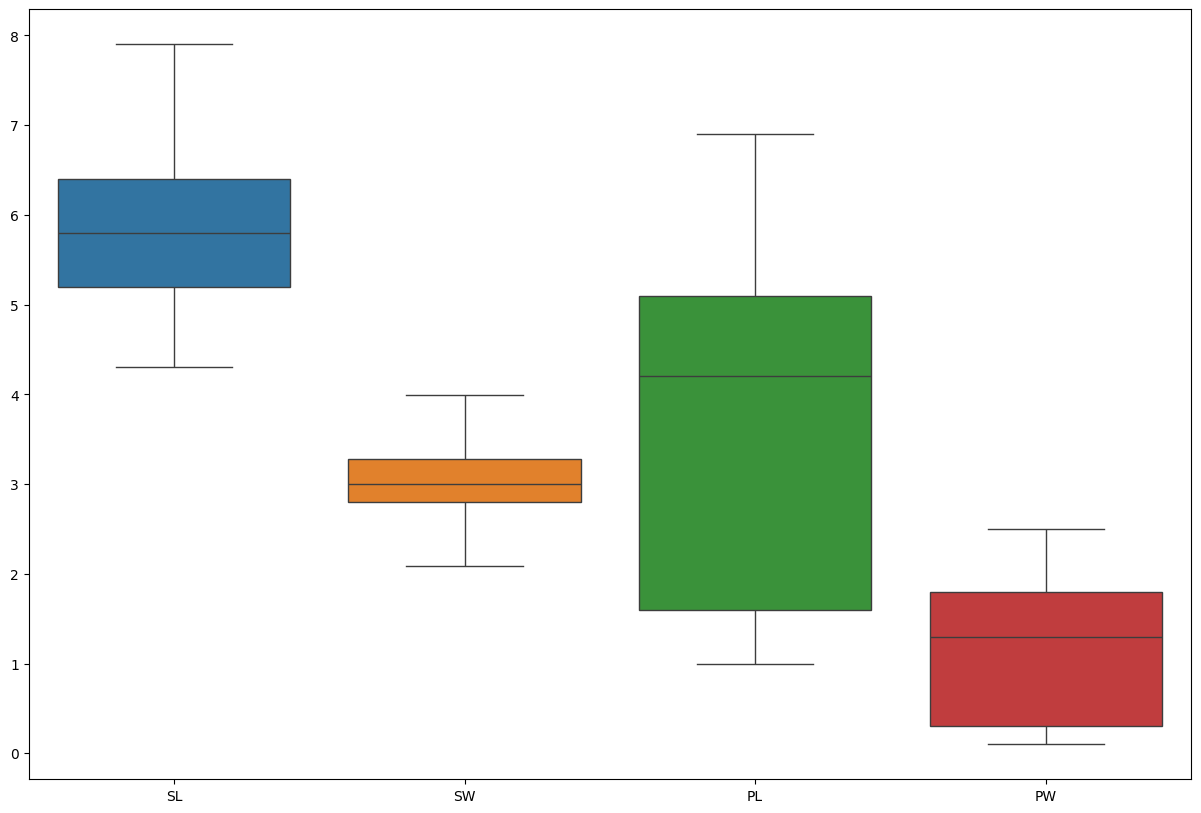

In [17]:
#Checking whether ouliers are clipped
features = df.drop("Classification",axis=1)
plt.figure(figsize=(15,10))
sns.boxplot(data = features)
plt.show()

In [18]:
df.shape

(150, 5)

In [19]:
#checking for duplicates
df1=df.drop_duplicates()

In [20]:
df1.shape

(147, 5)

In [ ]:
#Only 3 duplicates which may be ignored

In [21]:
df.shape

(150, 5)

In [22]:
df.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.855944,3.044889,3.756250,1.198667
std,0.808480,0.407197,1.725479,0.763161
min,4.300000,2.087500,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.200000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,3.987500,6.900000,2.500000


In [23]:
df['Classification'].value_counts()

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [ ]:
#As the range of values of all the features seem to be in the same range encoding for features is avoided
#The label/target varibale here is of string type which needs to be encoded and going for LabelEncoder

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Classification']=le.fit_transform(df['Classification'])

In [25]:
df['Classification'].value_counts()

Classification
0    50
1    50
2    50
Name: count, dtype: int64

In [26]:
df.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [27]:
#defining X and y
X=df.drop('Classification',axis=1)
y=df['Classification']

In [28]:
X

,SL,SW,PL,PW
0,5.100000,3.5,1.40000,0.2
1,4.900000,3.0,1.40000,0.2
2,5.855944,3.2,1.30000,0.2
3,4.600000,3.1,1.50000,0.2
4,5.000000,3.6,1.40000,0.2
...,...,...,...,...
145,6.700000,3.0,5.20000,2.3
146,6.300000,2.5,5.00000,1.9
147,6.500000,3.0,3.75625,2.0
148,6.200000,3.4,5.40000,2.3


In [29]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 150, dtype: int64

In [31]:
#splitting X_train,X_test,y_train,y_test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [35]:
#Prediction using Logistic regression
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(max_iter=150)    #max-tier parameterset to overcome the warning ConvergenceWarning: lbfgs failed to converge (status=1):
                                            #STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
model=logit.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [36]:
#Checking the netrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,average="micro")) #average changed from default binary as the target variable  is multiclass
print('Recall is', recall_score(y_test, y_pred,average="micro"))
print('f1 score is', f1_score(y_test,y_pred,average="micro"))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


In [49]:
##trying iwth differnet values for average
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,average="macro")) ##trying iwth differnet values for average
print('Recall is', recall_score(y_test, y_pred,average="macro"))
print('f1 score is', f1_score(y_test,y_pred,average="macro"))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


In [50]:
##trying iwth differnet values for average
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,average="weighted")) ##trying iwth differnet values for average
print('Recall is', recall_score(y_test, y_pred,average="weighted"))
print('f1 score is', f1_score(y_test,y_pred,average="weighted"))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


In [40]:
#predication witj KNN method
#finding best value for k
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbours=np.arange(3,15)
for k in neighbours:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(X_train,y_train)
  y_pred=classifier.predict(X_test)
  acc= accuracy_score(y_test,y_pred)
  metric_k.append(acc)



In [41]:
metric_k

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [42]:
#for k=4 we get accuracy of 1 for lowest value of given range of k ,so we take k=4
classifier=KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
y_pred_k=classifier.predict(X_test)


In [51]:
#checking metrices
print('Accuracy is', accuracy_score(y_test, y_pred_k))
print('Precision is', precision_score(y_test, y_pred_k,average="micro"))
print('Recall is', recall_score(y_test, y_pred_k,average="micro"))
print('f1 score is', f1_score(y_test,y_pred_k,average="micro"))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


In [52]:
#checking metrices
print('Accuracy is', accuracy_score(y_test, y_pred_k))
print('Precision is', precision_score(y_test, y_pred_k,average="macro"))
print('Recall is', recall_score(y_test, y_pred_k,average="macro"))
print('f1 score is', f1_score(y_test,y_pred_k,average="macro"))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


In [53]:
#checking metrices
print('Accuracy is', accuracy_score(y_test, y_pred_k))
print('Precision is', precision_score(y_test, y_pred_k,average="weighted"))
print('Recall is', recall_score(y_test, y_pred_k,average="weighted"))
print('f1 score is', f1_score(y_test,y_pred_k,average="weighted"))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


In [58]:
#Prediction with Decison tree
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42) #random stae given as otherwise it may change according to the tree decsion made
dt_clf.fit(X_train,y_train)
y_pred_dt=dt_clf.predict(X_test)

In [59]:
#checking metrices
print('Accuracy is', accuracy_score(y_test, y_pred_dt))
print('Precision is', precision_score(y_test, y_pred_dt,average="micro"))
print('Recall is', recall_score(y_test, y_pred_dt,average="micro"))
print('f1 score is', f1_score(y_test,y_pred_dt,average="micro"))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


In [60]:
#Predcition with Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
y_pred_rf=rf_clf.predict(X_test)


In [61]:
#checking metrices
print('Accuracy is', accuracy_score(y_test, y_pred_rf))
print('Precision is', precision_score(y_test, y_pred_rf,average="micro"))
print('Recall is', recall_score(y_test, y_pred_rf,average="micro"))
print('f1 score is', f1_score(y_test,y_pred_rf,average="micro"))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


In [74]:
#hypertuning
rf_clf = RandomForestClassifier(criterion='entropy',n_estimators=20)
rf_clf.fit(X_train,y_train)
y_pred_rf=rf_clf.predict(X_test)


In [75]:
print('Accuracy is', accuracy_score(y_test, y_pred_rf))
print('Precision is', precision_score(y_test, y_pred_rf,average="micro"))
print('Recall is', recall_score(y_test, y_pred_rf,average="micro"))
print('f1 score is', f1_score(y_test,y_pred_rf,average="micro"))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


In [ ]:
#No changes observed in the metrices with different values tried for criterion and n_estimators

Observation:All the clasiification models are giving the same metrices 1 .As such all the models are at par in prediction for the given dataset.

In [90]:
#Predicting using different models for a given set of values
data = np.array([[5.1,3.5,1.4,0.2]])
y_pred_log=model.predict(data)
y_pred_k=classifier.predict(data)
y_pred_dt=dt_clf.predict(data)
y_pred_rf=rf_clf.predict(data)
print(y_pred_log)
print(y_pred_k)
print(y_pred_dt)
print(y_pred_rf)


[0]
[0]
[0]
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
##All models are predicting the same

In [91]:
#trying with another set of values
data = np.array([[4.1,2.5,2.4,3.2]])
y_pred_log=model.predict(data)
y_pred_k=classifier.predict(data)
y_pred_dt=dt_clf.predict(data)
y_pred_rf=rf_clf.predict(data)
print(y_pred_log)
print(y_pred_k)
print(y_pred_dt)
print(y_pred_rf)


[2]
[1]
[1]
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [3]:
#Here two models are predicting the same